In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from __future__ import division

train_input = np.genfromtxt('trainInput.csv', delimiter=' ')
train_target = np.genfromtxt('trainTarget.csv')

In [11]:
#Question 3.1
#Since numpy has no in-built count-function, i simply wrote my own, and did an array-comprehension to report the frequencies in a list
def numpycounter(Arr, Att):
    acc = 0
    for i in range(len(Arr)):
        if Arr[i] == Att:
            acc+=1
    return acc

frequencies = [numpycounter(train_target,i)/len(train_target) for i in range(7)]
frequencies

[0.2567024128686327,
 0.4876005361930295,
 0.027479892761394103,
 0.058981233243967826,
 0.08378016085790885,
 0.06970509383378017,
 0.015750670241286863]

In [12]:
#Question 3.2
#Linear Algebra
cov_matrix = np.cov(np.transpose(train_input))
eigenval, eigenvec = np.linalg.eig(cov_matrix)

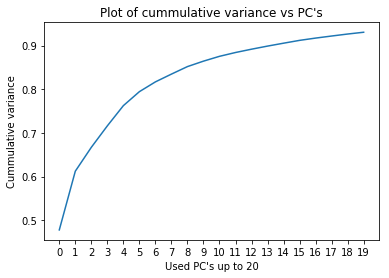

15


In [13]:
#Plotting 
plt.plot((np.cumsum(eigenval)/np.sum(eigenval))[0:20])
plt.title('Plot of cummulative variance vs PC\'s')
plt.ylabel('Cummulative variance')
plt.xlabel('Used PC\'s up to 20') #0 means 1 PC and so on
plt.xticks(np.arange(0, 20, 1.0))
plt.show()

for i in range(len(eigenval)):
    if (np.cumsum(eigenval)/np.sum(eigenval))[i] >= 0.9:
        print(i+1) #Because we start at 0
        break

#15 Principal components needed to explain 90% of the variance

In [14]:
#Only necesarry for preprocessing. However we didn't need to normalize the data for this task.
mean_ROI = []
for i in range(192):
    mean_ROI.append(np.mean(train_input[i]))

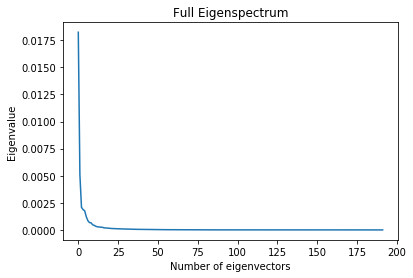

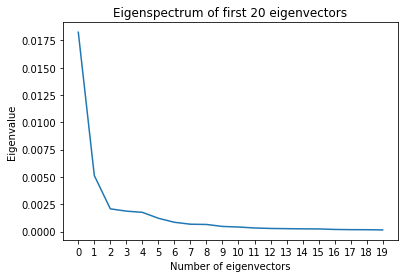

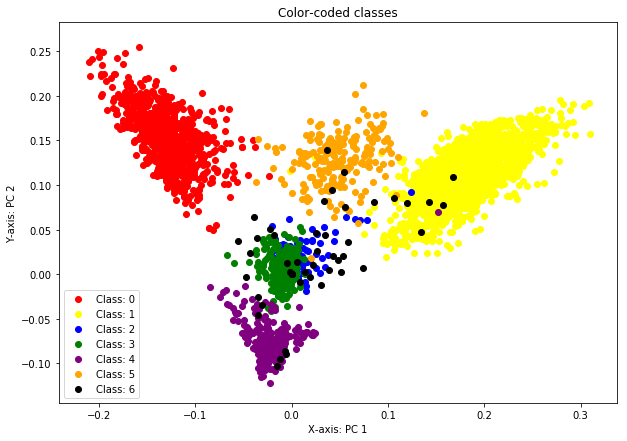

In [15]:
#Sorting eigenvectors by their largest eigenvalues
sorter = np.argsort(eigenval)
sorter = np.flipud(sorter)
sorted_eigenval = np.real(eigenval[sorter][:])
sorted_eigenvec = np.real(eigenvec[:,sorter])

#Plotting full spectrum
plt.plot(sorted_eigenval)
plt.title('Full Eigenspectrum')
plt.ylabel('Eigenvalue')
plt.xlabel('Number of eigenvectors')
plt.show()

#Plotting sub-spectrum
plt.plot(sorted_eigenval[0:20])
plt.title('Eigenspectrum of first 20 eigenvectors')
plt.ylabel('Eigenvalue')
plt.xlabel('Number of eigenvectors')
plt.xticks(np.arange(0, 20, 1.0))
plt.show()

#Getting the two first PC's
two_PC = sorted_eigenvec[:,0:2]
two_PC = np.dot(train_input, two_PC)

#Colorcoded plotting
color = ["red","yellow","blue","green","purple", "orange", "black"]
plt.figure(figsize=(10,7))
for i in range(7):
    plt.scatter(two_PC[train_target==i,0], two_PC[train_target==i,1], c=color[i], label="Class: " + str(i))
    plt.legend()
plt.title('Color-coded classes')
plt.ylabel('Y-axis: PC 2')
plt.xlabel('X-axis: PC 1')
plt.show()

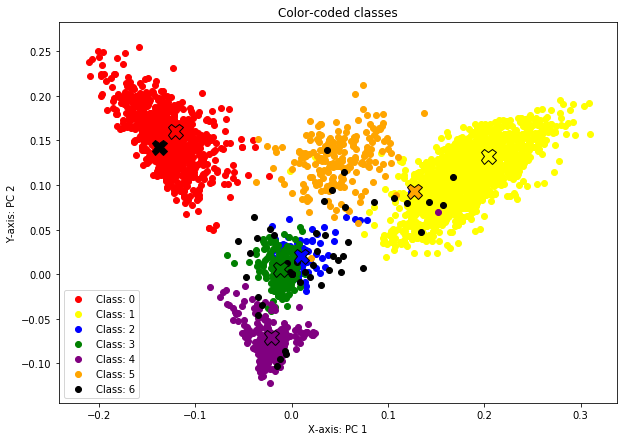

In [16]:
#Question 3.3
#Computing initial centroids
centroids = np.zeros(shape=(7,192))
for i in range(7):
    centroids[i,:] = train_input[np.where(train_target==i)[0][0]]

#Calculating clusters, and projecting them
clusters = KMeans(7, centroids, n_init=1)
clusters.fit(train_input)
finalclusters = clusters.cluster_centers_
two_PC_clusters = np.dot(finalclusters, sorted_eigenvec[:,0:2])

#Plotting color-coded classes but with the clusters projected down on the first two PC's
color = ["red","yellow","blue","green","purple", "orange", "black"]
plt.figure(figsize=(10,7))
for i in range(7):
    plt.scatter(two_PC[train_target==i,0], two_PC[train_target==i,1], c=color[i], label="Class: " + str(i))
    plt.plot(two_PC_clusters[i,0], two_PC_clusters[i,1], marker='X', markerfacecolor=color[i], markeredgecolor='black', markersize=15)
    plt.legend()
plt.title('Color-coded classes')
plt.ylabel('Y-axis: PC 2')
plt.xlabel('X-axis: PC 1')
plt.show()

In [17]:
#Question 3.5
#Using kNN-classifier for nonlinear classification
from sklearn.neighbors import KNeighborsClassifier

test_input = np.genfromtxt('testInput.csv', delimiter=' ')
test_target = np.genfromtxt('testTarget.csv')

#Training the model
kNN = KNeighborsClassifier()
kNN.fit(train_input,train_target)

#Predicting test and training
test_prediction = kNN.predict(test_input)
train_prediction = kNN.predict(train_input)

#Calculating accuracy
def classification_error(prediction, labels):
    if len(prediction) != len(labels):
        print("Prediction and labels should have the same dimension.")
        return 0
        
    acc = 0
    for i in range(len(prediction)):
        if prediction[i] == labels[i]:
            acc+=1
    return acc/len(prediction)

print("Train error: " + str(classification_error(train_prediction, train_target)))
print("Test error: " + str(classification_error(test_prediction, test_target)))

Train error: 0.993632707774799
Test error: 0.9396602226127709


In [18]:
#Note that logistic regression is not a non-linear classifier
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

test_input = np.genfromtxt('testInput.csv', delimiter=' ')
test_target = np.genfromtxt('testTarget.csv')

def logreg(train_data, train_labels, test_data): 
    myModel = LogisticRegression()

    #Adding the 1-collumn to train
    train = np.zeros((len(train_data),len(train_data[0])+1))
    train[:,0] = 1
    train[:,1:len(train[0])] = train_data[:,0:len(train_data[0])]

    #Adding the 1-collumn to test
    test = np.zeros((len(test_data),len(test_data[0])+1))
    test[:,0] = 1
    test[:,1:len(test[0])] = test_data[:,0:len(test_data[0])]

    myModel.fit(train,train_labels)
    predicted_labels, weights = myModel.predict(test), myModel.coef_[0]

    return predicted_labels,weights

predicted_labels, weights = logreg(train_input, train_target, test_input)

#Computing the accuracy of logreg on test-set
corr_acc = 0
for i in range(len(test_target)):
    if predicted_labels[i] == test_target[i]:
        corr_acc +=1
print(corr_acc/len(test_target))

#Computing the accuracy of logreg on train-set
corr_acc = 0
predicted_labels2, weights2 = logreg(train_input, train_target, train_input)
for i in range(len(train_target)):
    if predicted_labels2[i] == train_target[i]:
        corr_acc +=1
print(corr_acc/len(train_target))

0.8834212067955477
0.907171581769437
